In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os


In [18]:
print("Working Directory:", os.getcwd())


Working Directory: C:\Users\Preethi\OneDrive\Downloads\engineering\certificates\edunet internship\VED-master


In [19]:
print("Files and Folders:", os.listdir())
print("Part1 contents:", os.listdir("Data/VED_DynamicData_Part1"))
print("Part2 contents:", os.listdir("Data/VED_DynamicData_Part2"))


Files and Folders: ['Data', 'ev_range.ipynb', 'LICENSE', 'README.md']
Part1 contents: ['VED_171101_week.csv', 'VED_171108_week.csv', 'VED_171115_week.csv', 'VED_171122_week.csv', 'VED_171129_week.csv', 'VED_171206_week.csv', 'VED_171213_week.csv', 'VED_171220_week.csv', 'VED_171227_week.csv', 'VED_180103_week.csv', 'VED_180110_week.csv', 'VED_180117_week.csv', 'VED_180124_week.csv', 'VED_180131_week.csv', 'VED_180207_week.csv', 'VED_180214_week.csv', 'VED_180221_week.csv', 'VED_180228_week.csv', 'VED_180307_week.csv', 'VED_180314_week.csv', 'VED_180321_week.csv', 'VED_180328_week.csv']
Part2 contents: ['VED_180404_week.csv', 'VED_180411_week.csv', 'VED_180418_week.csv', 'VED_180425_week.csv', 'VED_180502_week.csv', 'VED_180509_week.csv', 'VED_180516_week.csv', 'VED_180523_week.csv', 'VED_180530_week.csv', 'VED_180606_week.csv', 'VED_180613_week.csv', 'VED_180620_week.csv', 'VED_180627_week.csv', 'VED_180704_week.csv', 'VED_180711_week.csv', 'VED_180718_week.csv', 'VED_180725_week.csv',

In [20]:
static_ev = pd.read_excel("Data/VED_Static_Data_PHEV&EV.xlsx")
print("Static EV Data preview:")
print(static_ev.head())


Static EV Data preview:
   VehId EngineType Vehicle Class Engine Configuration & Displacement  \
0      9       PHEV           Car                 4-GAS/ELECTRIC 1.4L   
1     10         EV           Car                            ELECTRIC   
2     11       PHEV           Car                 4-GAS/ELECTRIC 2.0L   
3    371       PHEV           Car                 4-GAS/ELECTRIC 2.0L   
4    379       PHEV           Car                 4-GAS/ELECTRIC 1.4L   

  Transmission Drive Wheels  Generalized_Weight  
0      NO DATA          FWD                4000  
1      NO DATA          FWD                3500  
2          CVT          FWD                4000  
3          CVT          FWD                4000  
4      NO DATA          FWD                4000  


In [21]:
ev_ids = static_ev[static_ev["EngineType"] == "EV"]["VehId"].tolist()
print("EV Vehicle IDs:", ev_ids)


EV Vehicle IDs: [10, 455, 541]


In [22]:
data_files = glob.glob("Data/VED_DynamicData_Part1/*.csv") + glob.glob("Data/VED_DynamicData_Part2/*.csv")
print("Dynamic data files found:", len(data_files))


Dynamic data files found: 54


In [23]:
frames = []
for file in data_files:
    df = pd.read_csv(file)
    ev_df = df[df['VehId'].isin(ev_ids)]
    frames.append(ev_df)

if frames:
    ev_dynamic = pd.concat(frames, ignore_index=True)
    print("First Rows of EV Dynamic Data:")
    print(ev_dynamic.head())
    print("Data Information:")
    print(ev_dynamic.info())
else:
    print("No EV dynamic data loaded. Please check data and filtering logic.")


First Rows of EV Dynamic Data:
     DayNum  VehId  Trip  Timestamp(ms)  Latitude[deg]  Longitude[deg]  \
0  1.719774     10  1558              0      42.277066      -83.763404   
1  1.719774     10  1558            200      42.277066      -83.763404   
2  1.719774     10  1558           1200      42.277066      -83.763404   
3  1.719774     10  1558           1500      42.277066      -83.763404   
4  1.719774     10  1558           2300      42.277066      -83.763404   

   Vehicle Speed[km/h]  MAF[g/sec]  Engine RPM[RPM]  Absolute Load[%]  ...  \
0            53.590000         NaN              NaN               NaN  ...   
1            51.980000         NaN              NaN               NaN  ...   
2            50.369999         NaN              NaN               NaN  ...   
3            50.369999         NaN              NaN               NaN  ...   
4            49.799999         NaN              NaN               NaN  ...   

   Air Conditioning Power[kW]  Air Conditioning Power[W

In [24]:
# Show columns and types
print(ev_dynamic.columns)
print(ev_dynamic.info())

# Basic statistical summary
print(ev_dynamic.describe())

# Count missing values per column
print(ev_dynamic.isnull().sum())


Index(['DayNum', 'VehId', 'Trip', 'Timestamp(ms)', 'Latitude[deg]',
       'Longitude[deg]', 'Vehicle Speed[km/h]', 'MAF[g/sec]',
       'Engine RPM[RPM]', 'Absolute Load[%]', 'OAT[DegC]', 'Fuel Rate[L/hr]',
       'Air Conditioning Power[kW]', 'Air Conditioning Power[Watts]',
       'Heater Power[Watts]', 'HV Battery Current[A]', 'HV Battery SOC[%]',
       'HV Battery Voltage[V]', 'Short Term Fuel Trim Bank 1[%]',
       'Short Term Fuel Trim Bank 2[%]', 'Long Term Fuel Trim Bank 1[%]',
       'Long Term Fuel Trim Bank 2[%]'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476308 entries, 0 to 476307
Data columns (total 22 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   DayNum                          476308 non-null  float64
 1   VehId                           476308 non-null  int64  
 2   Trip                            476308 non-null  int64  
 3   Timestamp(ms)    

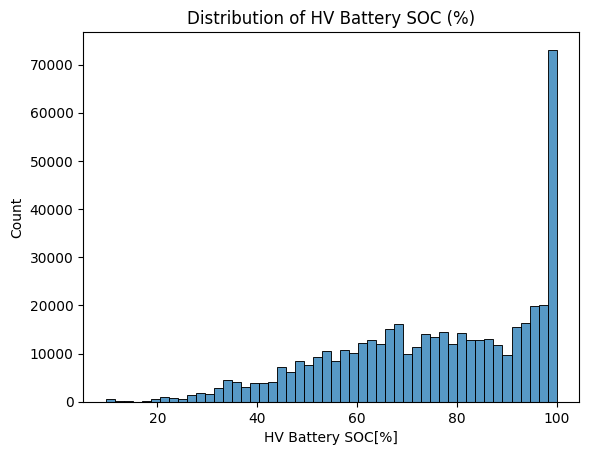

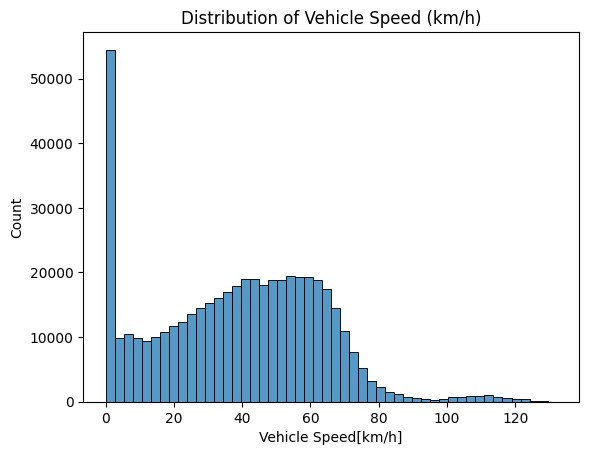

In [25]:
# Distribution of Battery SOC
sns.histplot(ev_dynamic["HV Battery SOC[%]"].dropna(), bins=50)
plt.title("Distribution of HV Battery SOC (%)")
plt.show()

# Distribution of Vehicle Speed
sns.histplot(ev_dynamic["Vehicle Speed[km/h]"].dropna(), bins=50)
plt.title("Distribution of Vehicle Speed (km/h)")
plt.show()


In [27]:
print(ev_dynamic.columns)


Index(['DayNum', 'VehId', 'Trip', 'Timestamp(ms)', 'Latitude[deg]',
       'Longitude[deg]', 'Vehicle Speed[km/h]', 'MAF[g/sec]',
       'Engine RPM[RPM]', 'Absolute Load[%]', 'OAT[DegC]', 'Fuel Rate[L/hr]',
       'Air Conditioning Power[kW]', 'Air Conditioning Power[Watts]',
       'Heater Power[Watts]', 'HV Battery Current[A]', 'HV Battery SOC[%]',
       'HV Battery Voltage[V]', 'Short Term Fuel Trim Bank 1[%]',
       'Short Term Fuel Trim Bank 2[%]', 'Long Term Fuel Trim Bank 1[%]',
       'Long Term Fuel Trim Bank 2[%]'],
      dtype='object')


In [28]:
trip_group = ev_dynamic.groupby(["VehId", "Trip"])
trip_summary = trip_group.agg({
    "HV Battery SOC[%]": ["first","last"],
    "Vehicle Speed[km/h]": "mean",
    "OAT[DegC]": "mean"
})
trip_summary.columns = ['_'.join(col) for col in trip_summary.columns]
trip_summary = trip_summary.reset_index()

# Calculate SOC Drop, Average Speed/Temp
trip_summary["SOC_drop"] = trip_summary["HV Battery SOC[%]_first"] - trip_summary["HV Battery SOC[%]_last"]
trip_summary["Avg_Speed"] = trip_summary["Vehicle Speed[km/h]_mean"]
trip_summary["Avg_Temp"] = trip_summary["OAT[DegC]_mean"]
print(trip_summary.head())


   VehId  Trip  HV Battery SOC[%]_first  HV Battery SOC[%]_last  \
0     10  1558                96.341469               95.853661   
1     10  1561                71.707321               66.463417   
2     10  1567                71.097565               67.560982   
3     10  1568                64.634148               63.658539   
4     10  1572                48.780487               46.585369   

   Vehicle Speed[km/h]_mean  OAT[DegC]_mean  SOC_drop  Avg_Speed   Avg_Temp  
0                 35.550077        5.000000  0.487808  35.550077   5.000000  
1                 22.925093        4.753745  5.243904  22.925093   4.753745  
2                 19.378746        9.322888  3.536583  19.378746   9.322888  
3                 26.365563        9.605634  0.975609  26.365563   9.605634  
4                 24.035848       14.164062  2.195118  24.035848  14.164062  


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

features = ["Avg_Speed", "Avg_Temp"]
target = "SOC_drop"

X = trip_summary[features]
y = trip_summary[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


MSE: 15.809674269753605
R2 Score: 0.03301407508142784


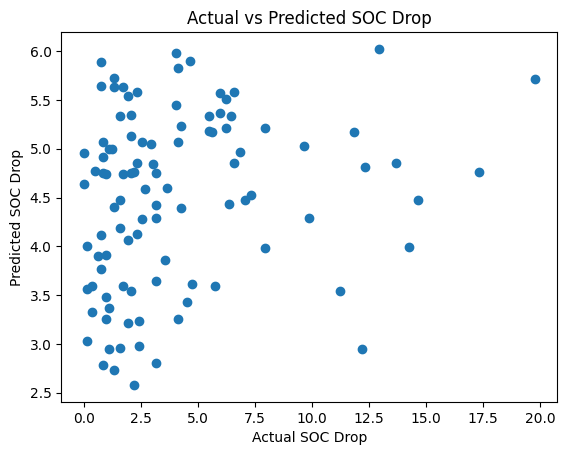

In [30]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual SOC Drop")
plt.ylabel("Predicted SOC Drop")
plt.title("Actual vs Predicted SOC Drop")
plt.show()
